## Clustering 

### K-Means

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation

In [13]:
'''
# Load dataset
df = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")

# Choose main features (others are very sparse, but you can keep them if you want)
features = ["Victims Killed", "Victims Injured", "Suspects Arrested"]

X = df[features].apply(pd.to_numeric, errors="coerce").dropna(how="all")

# --- 1. Log transform to reduce skew ---
X_log = np.log1p(X)   # log(1+x) handles zeros

# --- 2. Scale the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

# --- 3. Pick number of clusters with silhouette ---
ks = [2,3,4,5,6]
sil_scores = {}
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"k={k} silhouette={sil:.4f}")

plt.figure(figsize=(6,4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.grid(True)
plt.show()

best_k = max(sil_scores, key=sil_scores.get)
print("Silhouette scores:", sil_scores)
print("Best k:", best_k)

# --- 4. Run K-Means with best_k ---
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# --- 5. Cluster centroids (back to original scale) ---
centroids = pd.DataFrame(
    np.expm1(scaler.inverse_transform(kmeans.cluster_centers_)), 
    columns=features
)
print("\nCluster centroids (original scale, approx):")
print(centroids)

# --- 6. PCA visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set2", alpha=0.7)
plt.title("Gun Violence Clusters (PCA projection)")
plt.show()

# --- 7. Average values per cluster (easier to interpret) ---
cluster_means = df.groupby("Cluster")[features].mean()
print("\nAverage values per cluster:")
print(cluster_means)

cluster_means.plot(kind="bar", figsize=(10,6))
plt.title("Average Incident Characteristics by Cluster")
plt.ylabel("Average count")
plt.show()
'''

'\n# Load dataset\ndf = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")\n\n# Choose main features (others are very sparse, but you can keep them if you want)\nfeatures = ["Victims Killed", "Victims Injured", "Suspects Arrested"]\n\nX = df[features].apply(pd.to_numeric, errors="coerce").dropna(how="all")\n\n# --- 1. Log transform to reduce skew ---\nX_log = np.log1p(X)   # log(1+x) handles zeros\n\n# --- 2. Scale the data ---\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X_log)\n\n# --- 3. Pick number of clusters with silhouette ---\nks = [2,3,4,5,6]\nsil_scores = {}\nfor k in ks:\n    km = KMeans(n_clusters=k, random_state=42, n_init=10)\n    labels = km.fit_predict(X_scaled)\n    sil = silhouette_score(X_scaled, labels)\n    sil_scores[k] = sil\n    print(f"k={k} silhouette={sil:.4f}")\n\nplt.figure(figsize=(6,4))\nplt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")\nplt.xlabel("k")\nplt.ylabel("Silhouette score")\nplt.title("Silhouette

In [14]:
'''
inertias = []
silhouettes = []
K = range(2, 12)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    
    # Silhouette only makes sense if k < n_samples
    from sklearn.metrics import silhouette_score
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'o-')
plt.xlabel("k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'o-')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()
'''

'\ninertias = []\nsilhouettes = []\nK = range(2, 12)\n\nfor k in K:\n    km = KMeans(n_clusters=k, random_state=42, n_init=10)\n    labels = km.fit_predict(X_scaled)\n    inertias.append(km.inertia_)\n\n    # Silhouette only makes sense if k < n_samples\n    from sklearn.metrics import silhouette_score\n    silhouettes.append(silhouette_score(X_scaled, labels))\n\nplt.figure(figsize=(12,5))\n\nplt.subplot(1,2,1)\nplt.plot(K, inertias, \'o-\')\nplt.xlabel("k")\nplt.ylabel("Inertia (within-cluster SSE)")\nplt.title("Elbow Method")\n\nplt.subplot(1,2,2)\nplt.plot(K, silhouettes, \'o-\')\nplt.xlabel("k")\nplt.ylabel("Silhouette Score")\nplt.title("Silhouette Scores")\nplt.show()\n'

#### Mass Shootings

k=2 silhouette=0.7019
k=3 silhouette=0.6930
k=4 silhouette=0.7223
k=5 silhouette=0.5883
k=6 silhouette=0.5263


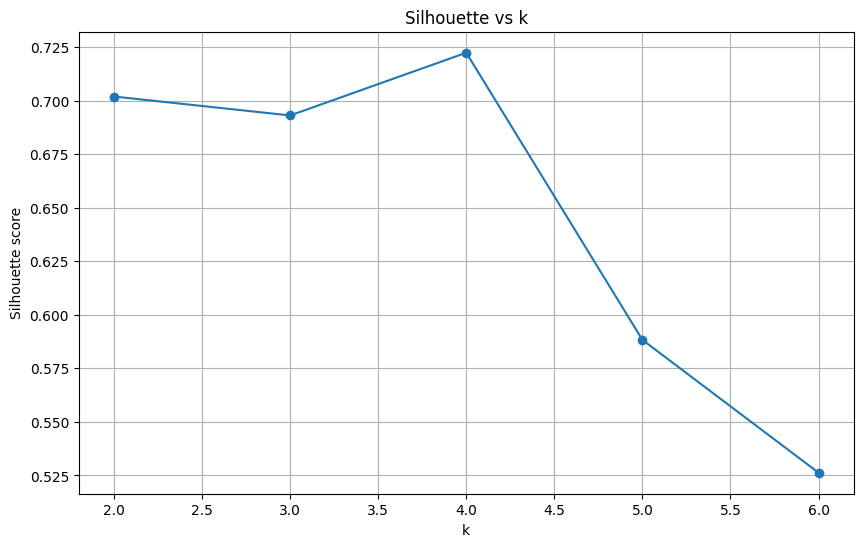

In [68]:
df = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", "Suspects Injured", "Suspects Arrested"]
df_num = df[num_cols].apply(pd.to_numeric, errors="coerce")

df_num = df_num.dropna(how="all").fillna(0)

X = df_num.values

# 4) scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) try multiple k values and compute silhouette
ks = [2,3,4,5,6]
sil_scores = {}
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"k={k} silhouette={sil:.4f}")

# 6) plot silhouette vs k
plt.figure(figsize=(10,6))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.grid(True)
plt.show()

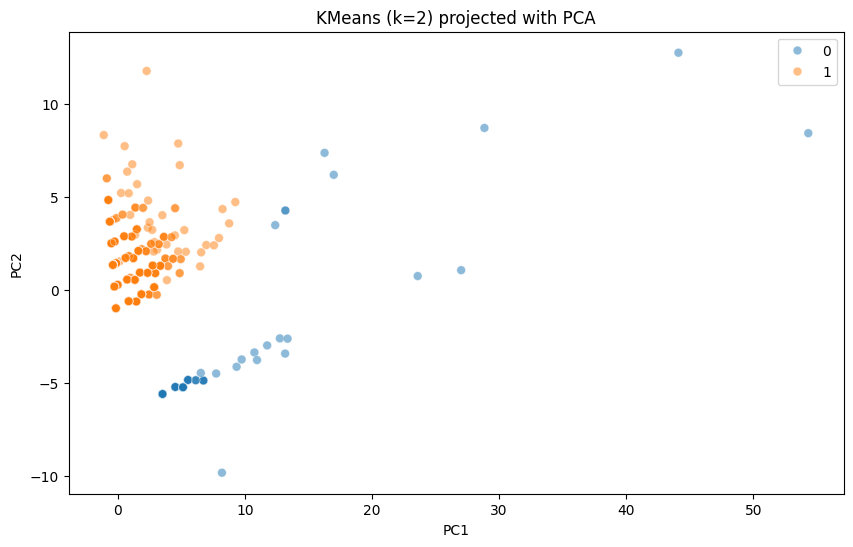

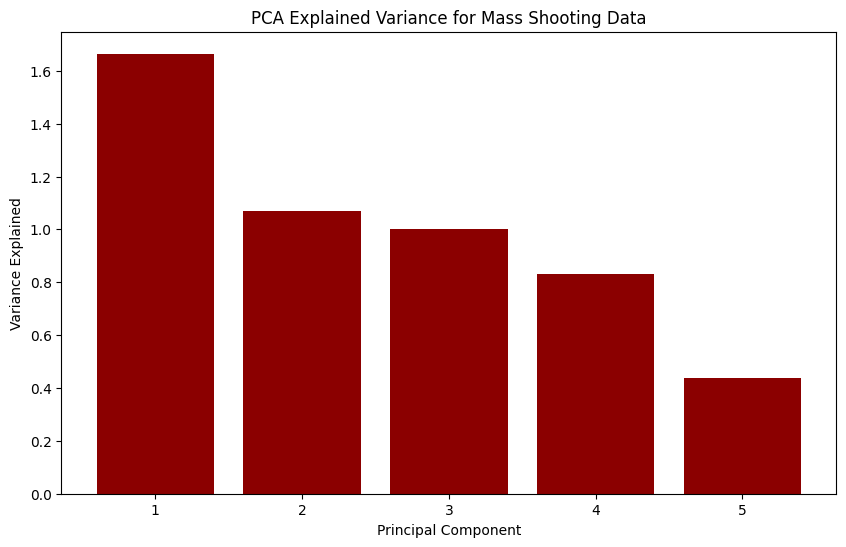

In [72]:
# 7) visualize clusters for a chosen k (e.g., best_k)
best_k = max(sil_scores, key=sil_scores.get)
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# 2D projection with PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels, palette="tab10", s=40, legend="full", alpha= 0.5)
plt.title(f"KMeans (k={best_k}) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(0, 14)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkred')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Mass Shooting Data')
plt.show()

# Optional: save results back to CSV
# df_result = df.copy()
# df_result = df_result.loc[df_num.index]  # align rows
# df_result["kmeans_label"] = labels
# df_result.to_csv("clustering_with_labels.csv", index=False)

#### School Shootings

k=2 silhouette=0.8835
k=3 silhouette=0.8770
k=4 silhouette=0.8786
k=5 silhouette=0.6904
k=6 silhouette=0.7262


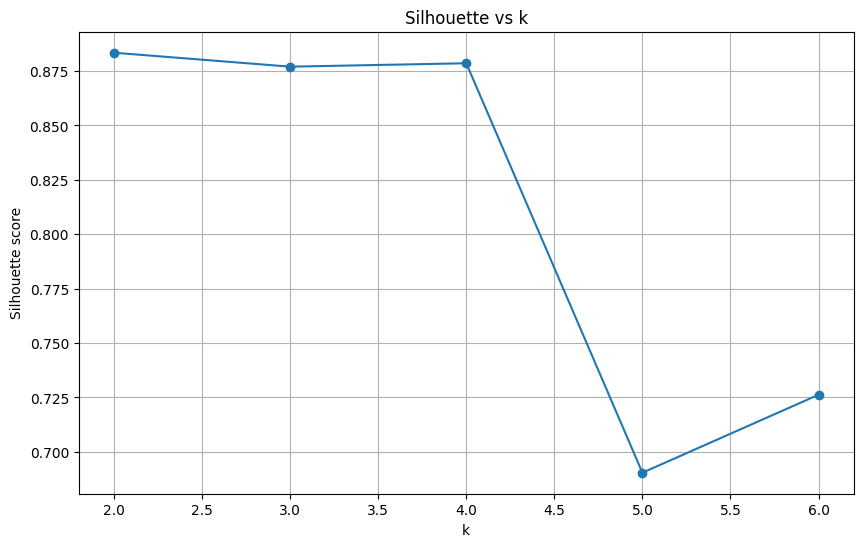

In [73]:
df = pd.read_csv("gunviolencearchive_school_shooting.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", "Suspects Injured", "Suspects Arrested"]
df_num = df[num_cols].apply(pd.to_numeric, errors="coerce")

df_num = df_num.dropna(how="all").fillna(0)

X = df_num.values

# 4) scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) try multiple k values and compute silhouette
ks = [2,3,4,5,6]
sil_scores = {}
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"k={k} silhouette={sil:.4f}")

# 6) plot silhouette vs k
plt.figure(figsize=(10,6))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.grid(True)
plt.show()

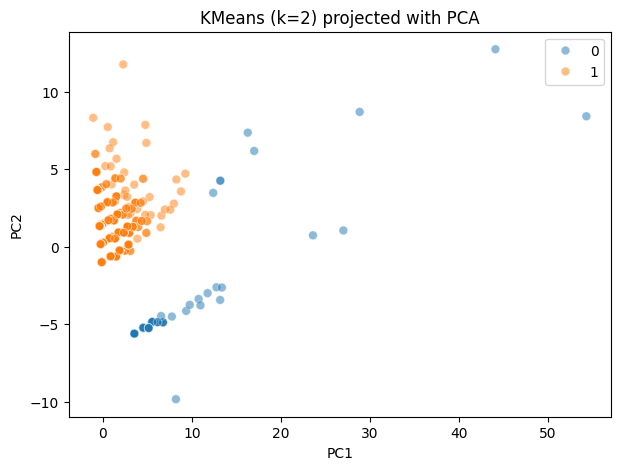

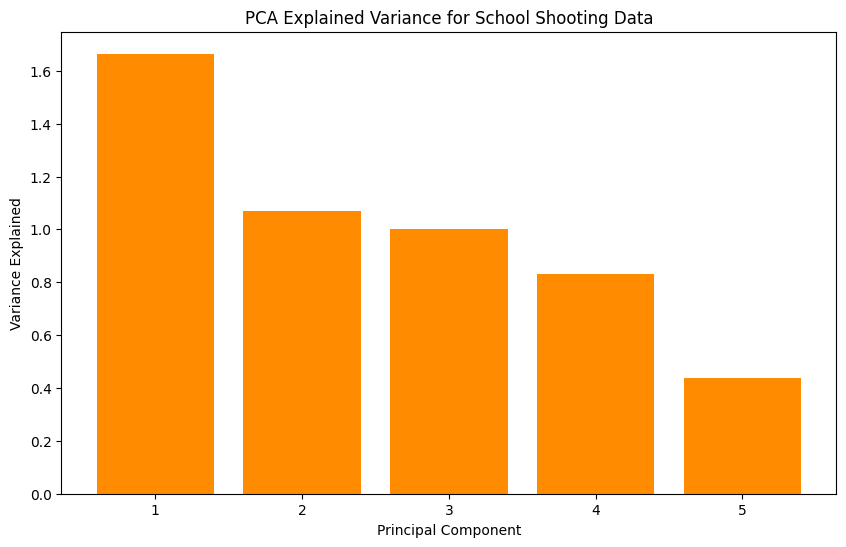

In [74]:
# 7) visualize clusters for a chosen k (e.g., best_k)
best_k = max(sil_scores, key=sil_scores.get)
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# 2D projection with PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(7,5))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels, palette="tab10", s=40, legend="full", alpha= 0.5)
plt.title(f"KMeans (k={best_k}) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(0, 14)

plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkorange')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for School Shooting Data')
plt.show()

# Optional: save results back to CSV
# df_result = df.copy()
# df_result = df_result.loc[df_num.index]  # align rows
# df_result["kmeans_label"] = labels
# df_result.to_csv("clustering_with_labels.csv", index=False)

#### Accidental Deaths

k=2 silhouette=0.8514
k=3 silhouette=0.8649
k=4 silhouette=0.8003
k=5 silhouette=0.8804
k=6 silhouette=0.8878


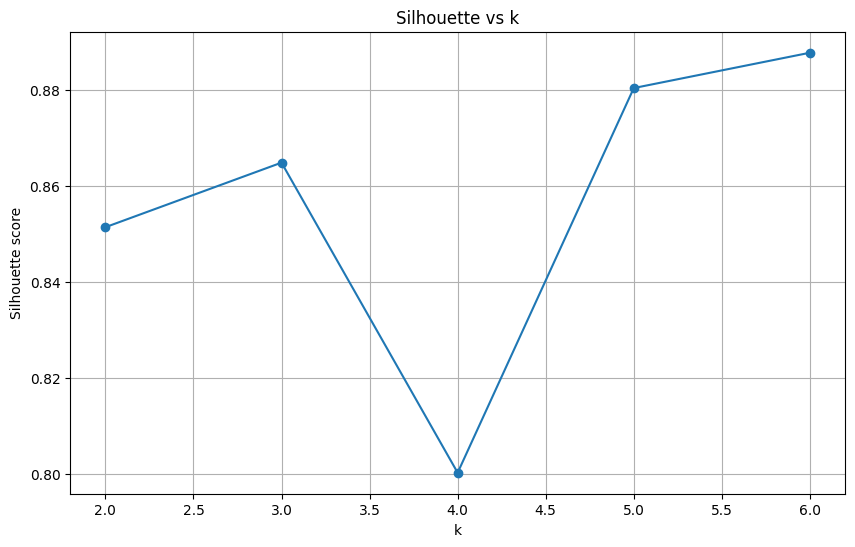

In [75]:
df = pd.read_csv("gunviolencearchive_accidental_deaths.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", "Suspects Injured", "Suspects Arrested"]
df_num = df[num_cols].apply(pd.to_numeric, errors="coerce")

df_num = df_num.dropna(how="all").fillna(0)

X = df_num.values

# 4) scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) try multiple k values and compute silhouette
ks = [2,3,4,5,6]
sil_scores = {}
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"k={k} silhouette={sil:.4f}")

# 6) plot silhouette vs k
plt.figure(figsize=(10,6))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.grid(True)
plt.show()

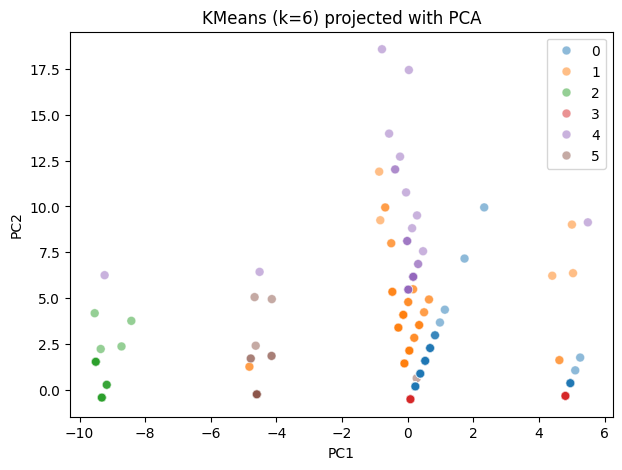

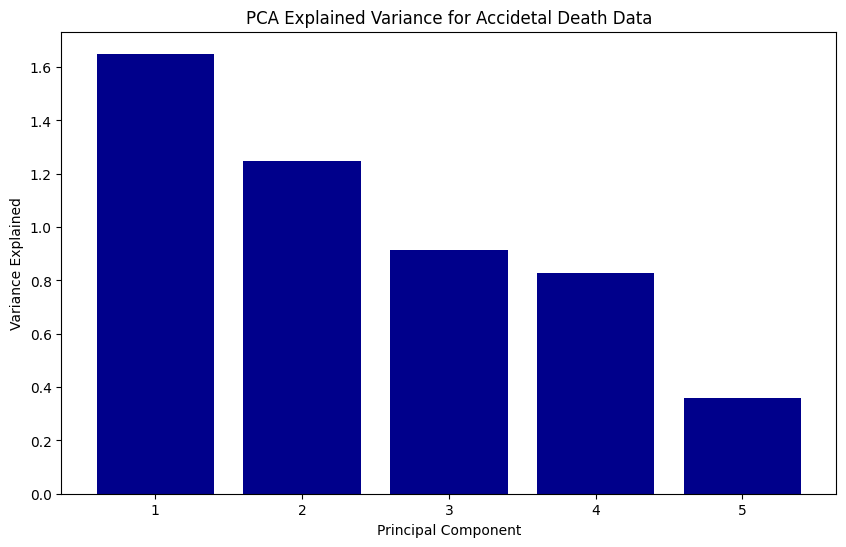

In [76]:
# 7) visualize clusters for a chosen k (e.g., best_k)
best_k = max(sil_scores, key=sil_scores.get)
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# 2D projection with PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(7,5))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels, palette="tab10", s=40, legend="full", alpha= 0.5)
plt.title(f"KMeans (k={best_k}) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(0, 14)

plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkblue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Accidetal Death Data')
plt.show()

# Optional: save results back to CSV
# df_result = df.copy()
# df_result = df_result.loc[df_num.index]  # align rows
# df_result["kmeans_label"] = labels
# df_result.to_csv("clustering_with_labels.csv", index=False)

#### Accidental Injuries

k=2 silhouette=0.7388
k=3 silhouette=0.7539
k=4 silhouette=0.7789
k=5 silhouette=0.8226
k=6 silhouette=0.8915


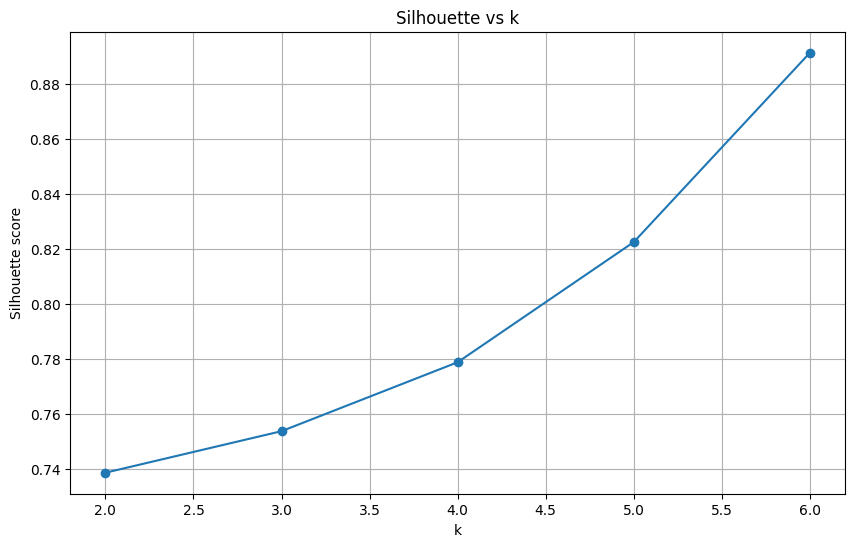

In [77]:
df = pd.read_csv("gunviolencearchive_accidental_injuries.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", "Suspects Injured", "Suspects Arrested"]
df_num = df[num_cols].apply(pd.to_numeric, errors="coerce")

df_num = df_num.dropna(how="all").fillna(0)

X = df_num.values

# 4) scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) try multiple k values and compute silhouette
ks = [2,3,4,5,6]
sil_scores = {}
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"k={k} silhouette={sil:.4f}")

# 6) plot silhouette vs k
plt.figure(figsize=(10,6))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.grid(True)
plt.show()

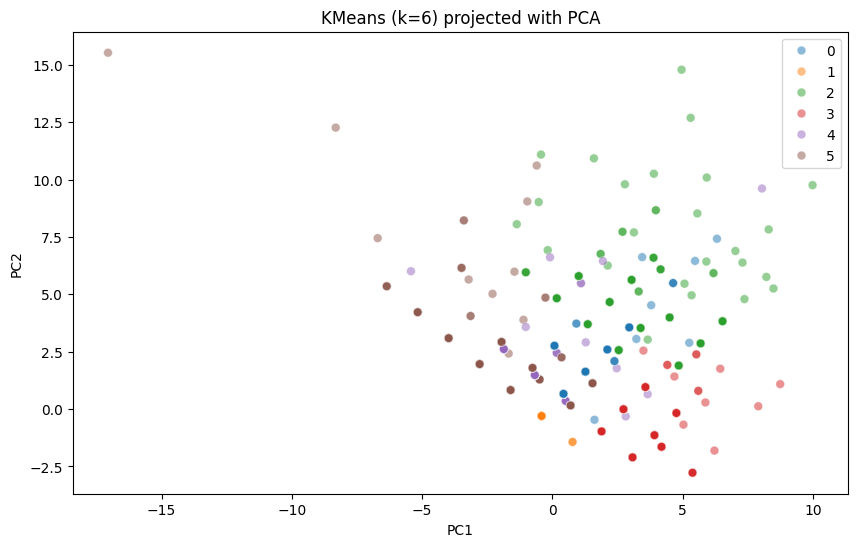

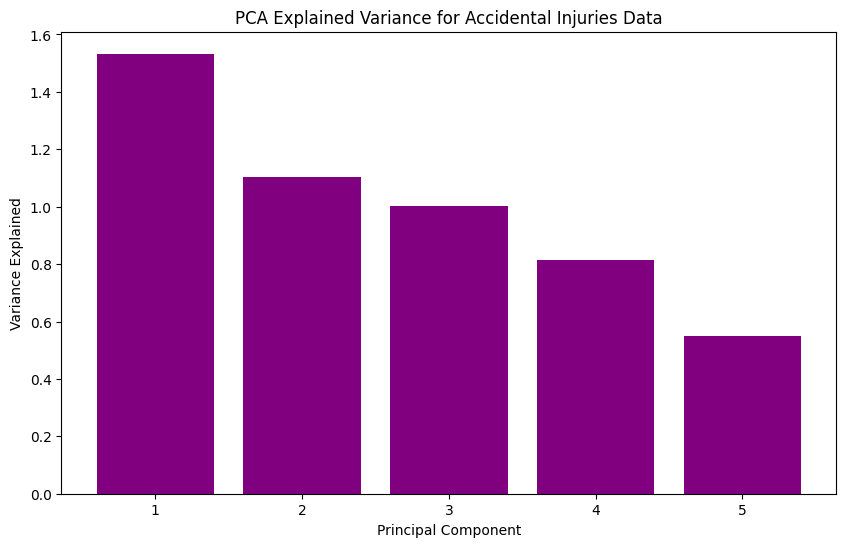

In [78]:
# 7) visualize clusters for a chosen k (e.g., best_k)
best_k = max(sil_scores, key=sil_scores.get)
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# 2D projection with PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels, palette="tab10", s=40, legend="full", alpha= 0.5)
plt.title(f"KMeans (k={best_k}) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(0, 14)

plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='purple')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Accidental Injuries Data')
plt.show()

# Optional: save results back to CSV
# df_result = df.copy()
# df_result = df_result.loc[df_num.index]  # align rows
# df_result["kmeans_label"] = labels
# df_result.to_csv("clustering_with_labels.csv", index=False)

#### Officer Involved

k=2 silhouette=0.9663
k=3 silhouette=0.5234
k=4 silhouette=0.6565
k=5 silhouette=0.6587
k=6 silhouette=0.7250


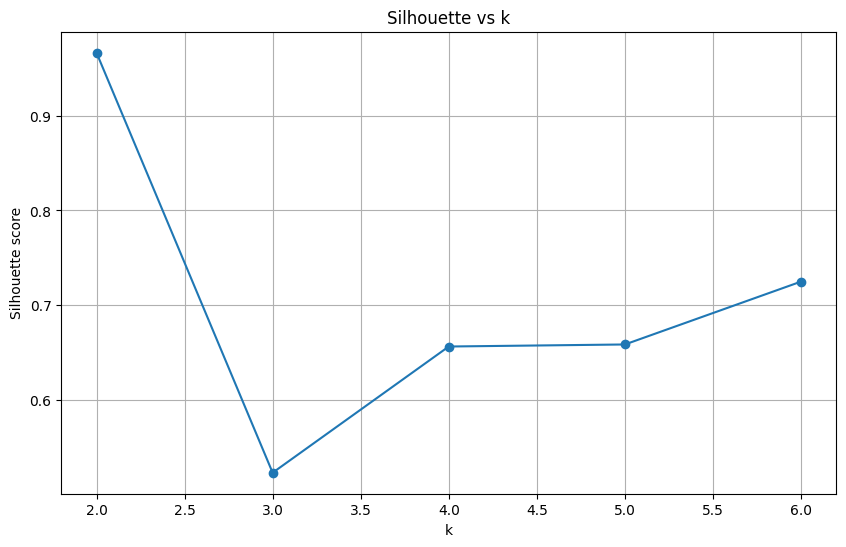

In [79]:
df = pd.read_csv("gunviolencearchive_officer_involved_shooting.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", "Suspects Injured", "Suspects Arrested"]
df_num = df[num_cols].apply(pd.to_numeric, errors="coerce")

df_num = df_num.dropna(how="all").fillna(0)

X = df_num.values

# 4) scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) try multiple k values and compute silhouette
ks = [2,3,4,5,6]
sil_scores = {}
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil
    print(f"k={k} silhouette={sil:.4f}")

# 6) plot silhouette vs k
plt.figure(figsize=(10,6))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.grid(True)
plt.show()

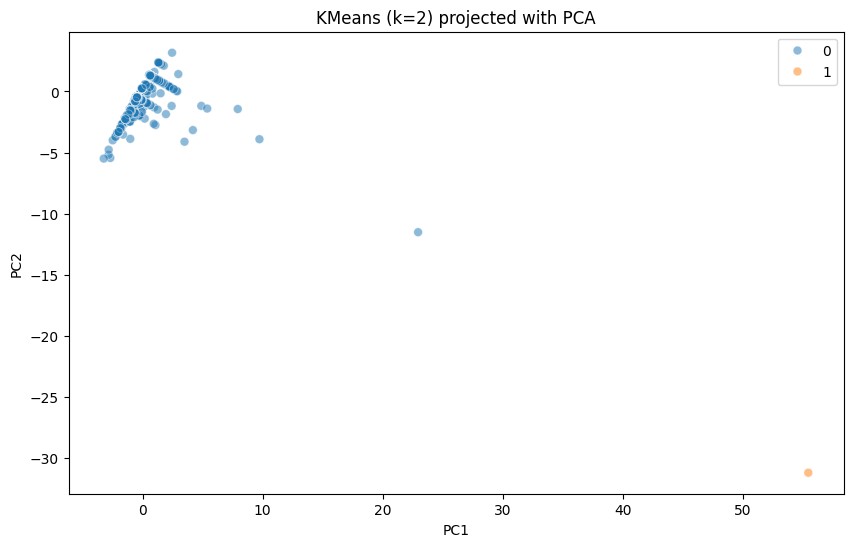

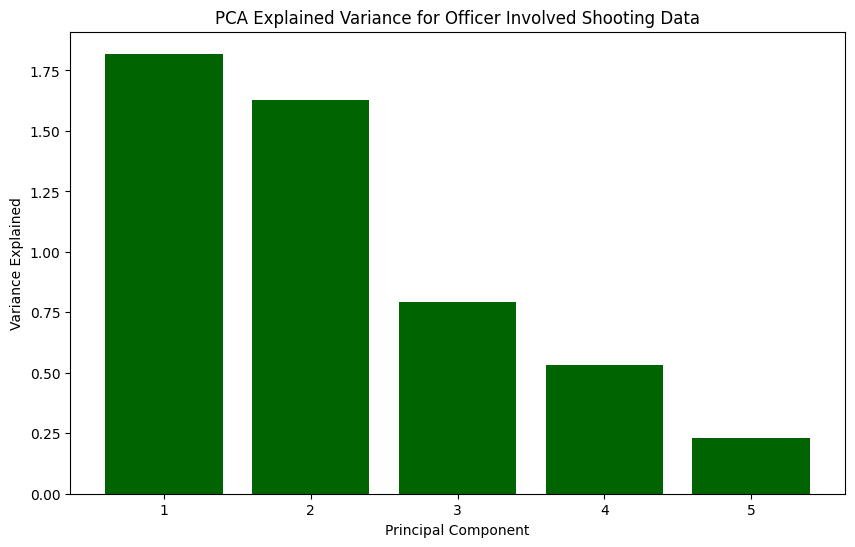

In [81]:
# 7) visualize clusters for a chosen k (e.g., best_k)
best_k = max(sil_scores, key=sil_scores.get)
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# 2D projection with PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels, palette="tab10", s=40, legend="full", alpha= 0.5)
plt.title(f"KMeans (k={best_k}) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.xlim(0, 14)

plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkgreen')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Officer Involved Shooting Data')
plt.show()

# Optional: save results back to CSV
# df_result = df.copy()
# df_result = df_result.loc[df_num.index]  # align rows
# df_result["kmeans_label"] = labels
# df_result.to_csv("clustering_with_labels.csv", index=False)

### Hierarchical

#### Mass Shooting

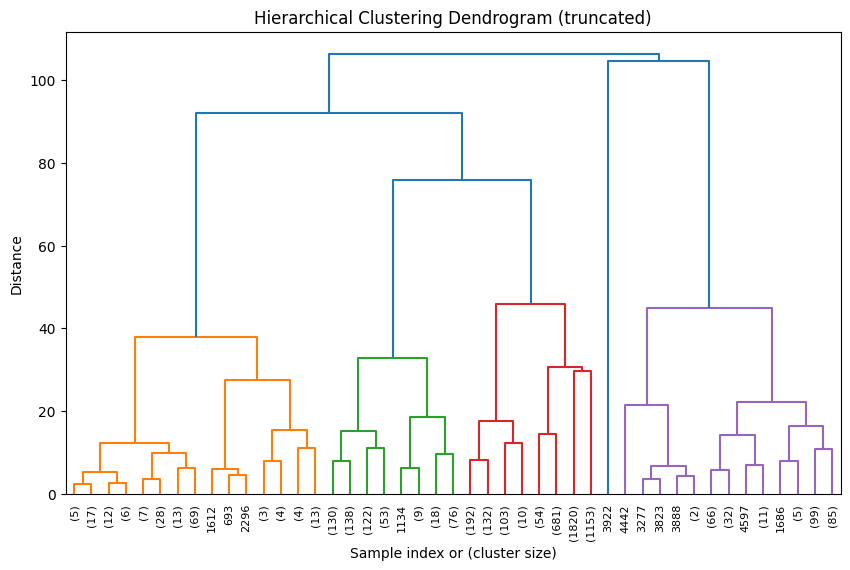

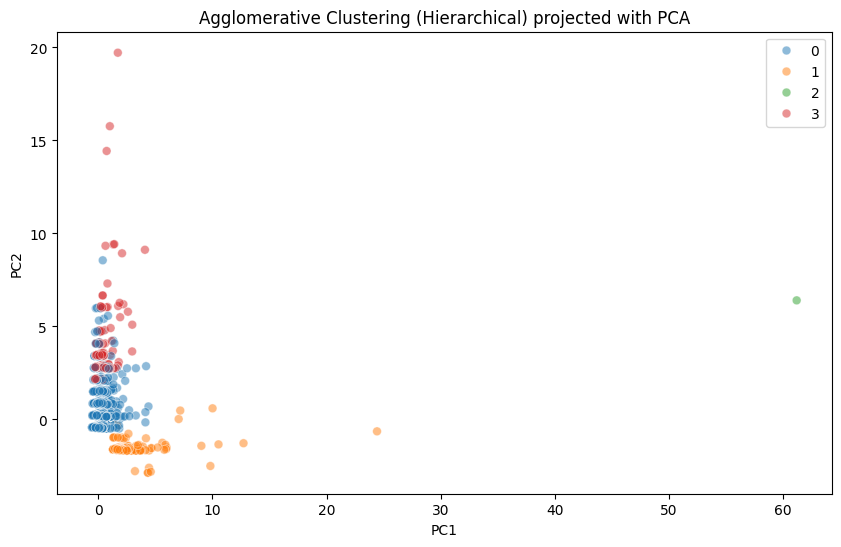

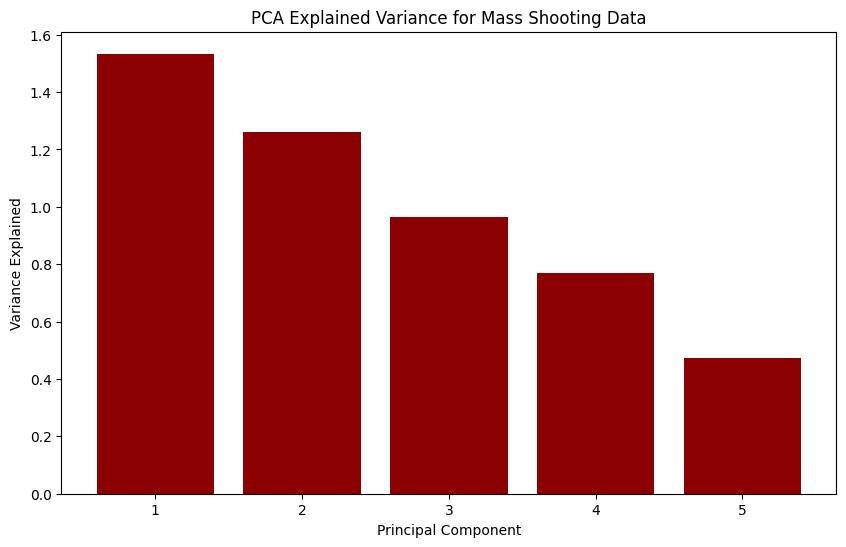

Cluster means (original scale):
   Victims Killed  Victims Injured  Suspects Killed  Suspects Injured  \
0        0.840153         4.088448         0.000000          0.000639   
1        3.388889         3.307190         1.019608          0.003268   
2       60.000000       439.000000         1.000000          0.000000   
3        1.086957         5.038043         0.027174          1.179348   

   Suspects Arrested  
0           0.594416  
1           0.058824  
2           0.000000  
3           1.657609  


In [82]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# --- 1) Load your data (already cleaned in your workflow) ---
df = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", 
            "Suspects Injured", "Suspects Arrested"]

df_num = df[num_cols].apply(pd.to_numeric, errors="coerce").dropna(how="all").fillna(0)
X = df_num.values

# --- 2) Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3) Dendrogram (for visualizing hierarchical structure) ---
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')   # Ward minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # p=5 shows last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# --- 4) Agglomerative clustering with chosen number of clusters ---
hclust = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_h = hclust.fit_predict(X_scaled)

# --- 5) Project to 2D for visualization ---
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels_h, palette="tab10", s=40, alpha=0.5)
plt.title("Agglomerative Clustering (Hierarchical) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkred')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Mass Shooting Data')
plt.show()

# --- 6) Optional: summarize cluster means ---
cluster_summary = pd.DataFrame(X, columns=num_cols).groupby(labels_h).mean()
print("Cluster means (original scale):")
print(cluster_summary)


#### School Shooting

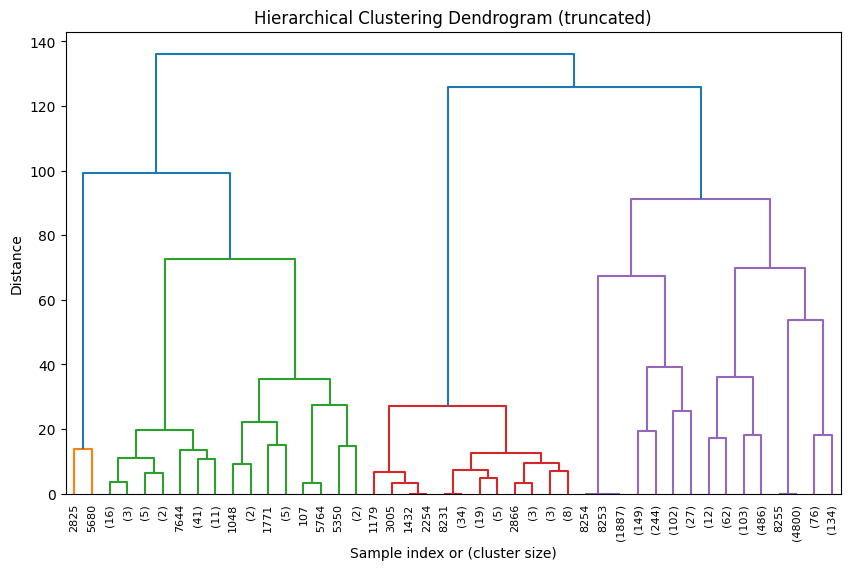

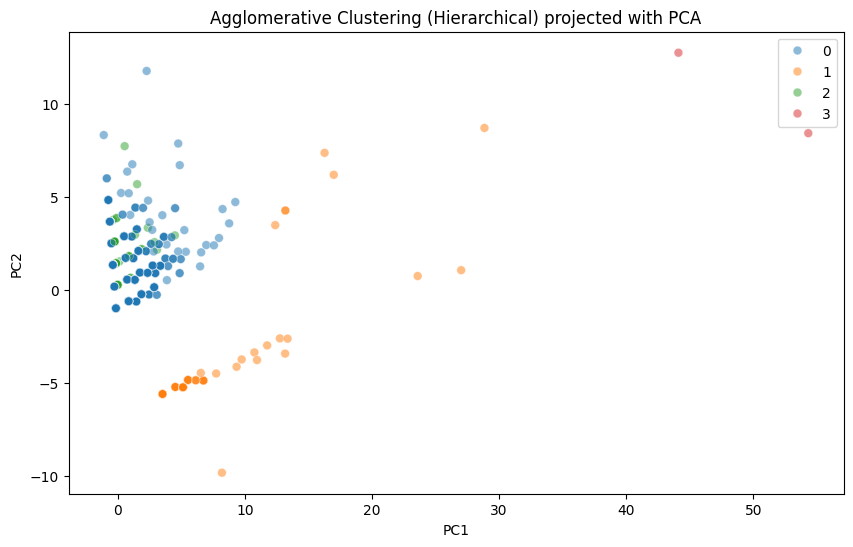

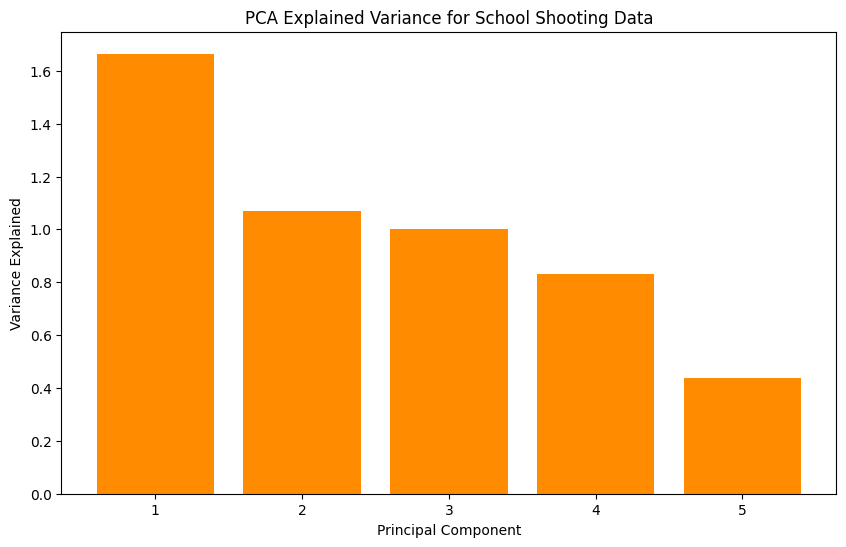

Cluster means (original scale):
   Victims Killed  Victims Injured  Suspects Killed  Suspects Injured  \
0        0.030921         0.106741         0.000000          0.000000   
1        1.010753         1.376344         0.946237          0.000000   
2        0.064103         0.243590         0.000000          1.051282   
3       19.000000        17.000000         0.500000          0.000000   

   Suspects Arrested  
0           0.843166  
1           0.075269  
2           0.756410  
3           0.500000  


In [84]:
# --- 1) Load your data (already cleaned in your workflow) ---
df = pd.read_csv("gunviolencearchive_school_shooting.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", 
            "Suspects Injured", "Suspects Arrested"]

df_num = df[num_cols].apply(pd.to_numeric, errors="coerce").dropna(how="all").fillna(0)
X = df_num.values

# --- 2) Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3) Dendrogram (for visualizing hierarchical structure) ---
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')   # Ward minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # p=5 shows last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# --- 4) Agglomerative clustering with chosen number of clusters ---
hclust = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_h = hclust.fit_predict(X_scaled)

# --- 5) Project to 2D for visualization ---
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels_h, palette="tab10", s=40, alpha=0.5)
plt.title("Agglomerative Clustering (Hierarchical) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkorange')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for School Shooting Data')
plt.show()

# --- 6) Optional: summarize cluster means ---
cluster_summary = pd.DataFrame(X, columns=num_cols).groupby(labels_h).mean()
print("Cluster means (original scale):")
print(cluster_summary)


#### Accidental Deaths

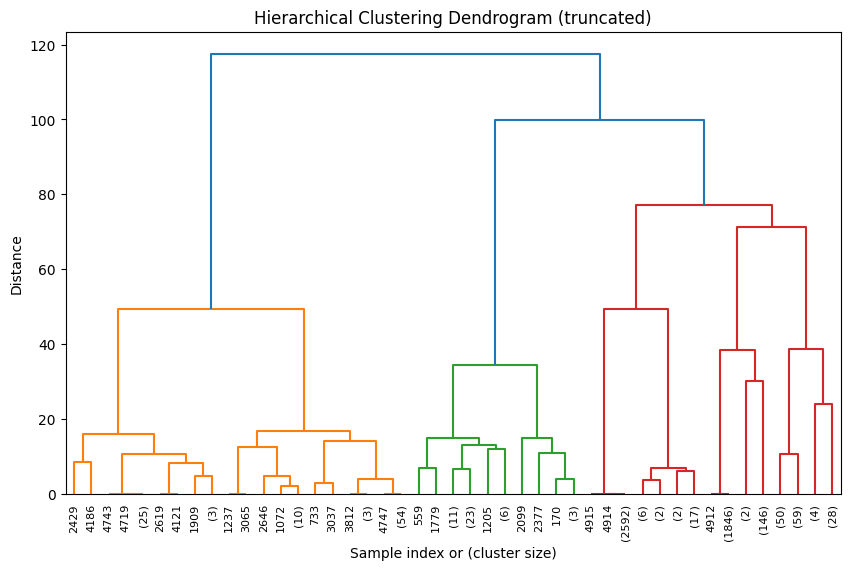

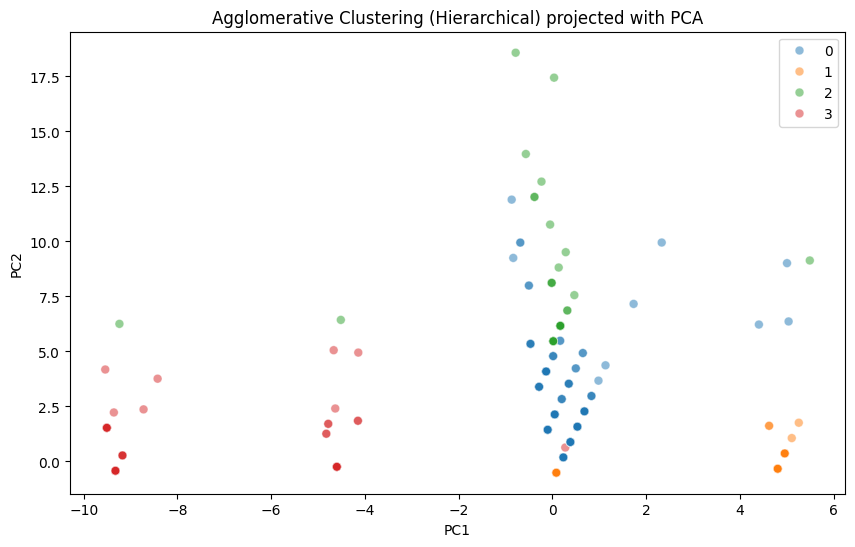

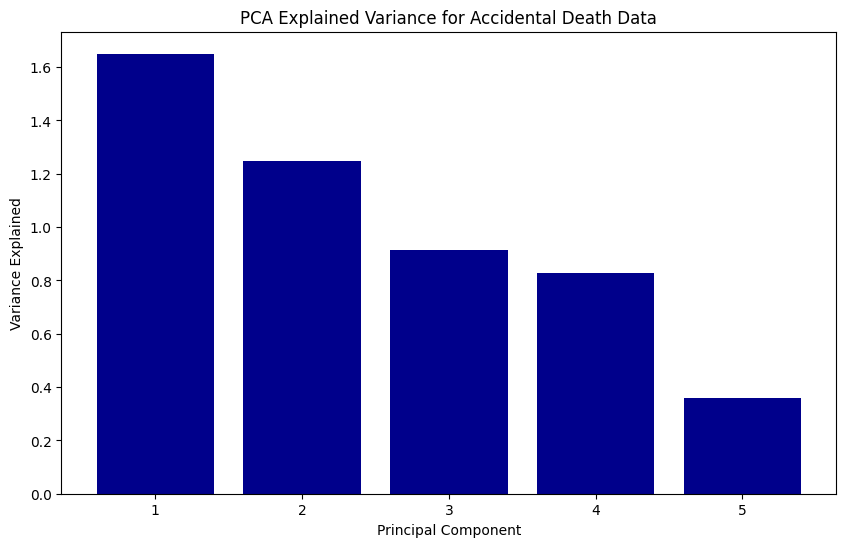

Cluster means (original scale):
   Victims Killed  Victims Injured  Suspects Killed  Suspects Injured  \
0        1.001404         0.096910         0.000000          0.000000   
1        1.010301         0.000763         0.000000          0.000000   
2        1.000000         0.571429         0.040816          1.020408   
3        0.336364         0.190909         0.990909          0.000000   

   Suspects Arrested  
0           1.085206  
1           0.004197  
2           1.102041  
3           0.272727  


In [85]:
# --- 1) Load your data (already cleaned in your workflow) ---
df = pd.read_csv("gunviolencearchive_accidental_deaths.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", 
            "Suspects Injured", "Suspects Arrested"]

df_num = df[num_cols].apply(pd.to_numeric, errors="coerce").dropna(how="all").fillna(0)
X = df_num.values

# --- 2) Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3) Dendrogram (for visualizing hierarchical structure) ---
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')   # Ward minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # p=5 shows last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# --- 4) Agglomerative clustering with chosen number of clusters ---
hclust = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_h = hclust.fit_predict(X_scaled)

# --- 5) Project to 2D for visualization ---
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels_h, palette="tab10", s=40, alpha=0.5)
plt.title("Agglomerative Clustering (Hierarchical) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkblue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Accidental Death Data')
plt.show()

# --- 6) Optional: summarize cluster means ---
cluster_summary = pd.DataFrame(X, columns=num_cols).groupby(labels_h).mean()
print("Cluster means (original scale):")
print(cluster_summary)


#### Accidental Injuries

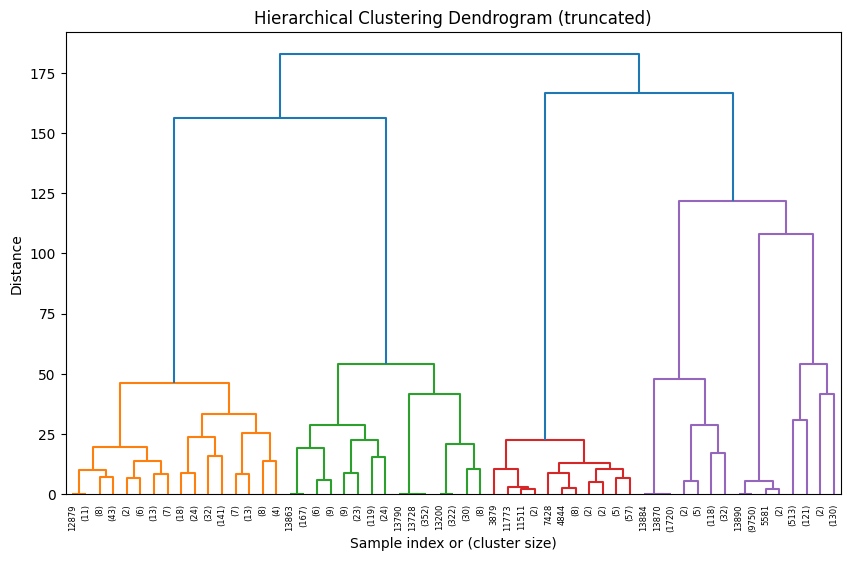

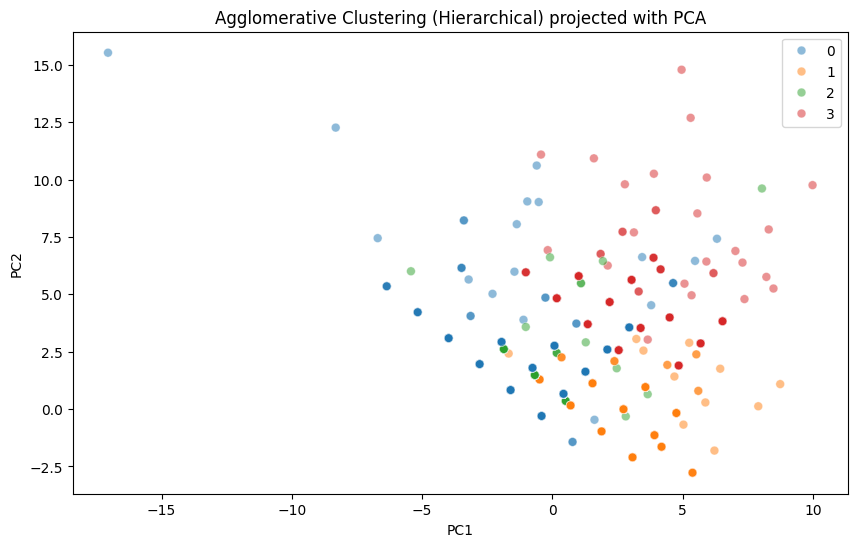

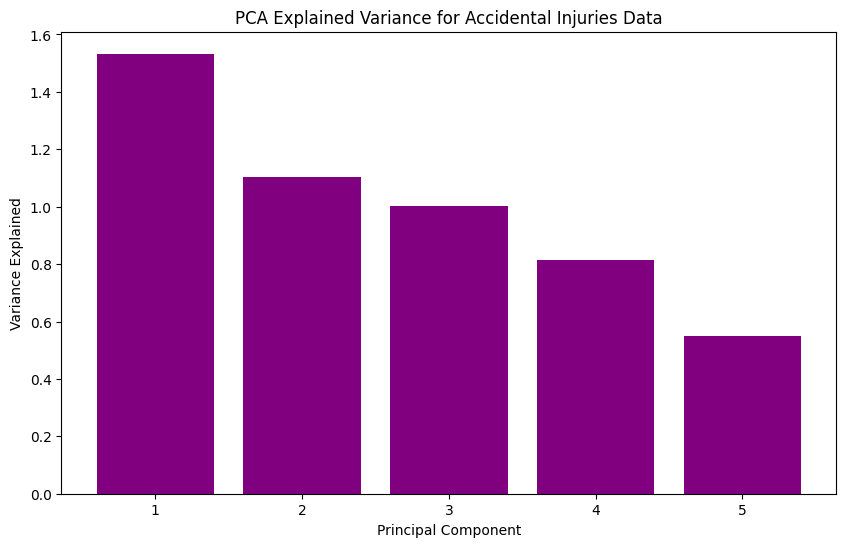

Cluster means (original scale):
   Victims Killed  Victims Injured  Suspects Killed  Suspects Injured  \
0        0.000403         1.079119              0.0          0.000242   
1        0.000000         0.378378              0.0          1.019571   
2        0.074074         1.086420              1.0          0.061728   
3        1.035503         0.914201              0.0          0.286982   

   Suspects Arrested  
0           0.185579  
1           0.557316  
2           0.123457  
3           0.781065  


In [86]:
# --- 1) Load your data (already cleaned in your workflow) ---
df = pd.read_csv("gunviolencearchive_accidental_injuries.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", 
            "Suspects Injured", "Suspects Arrested"]

df_num = df[num_cols].apply(pd.to_numeric, errors="coerce").dropna(how="all").fillna(0)
X = df_num.values

# --- 2) Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3) Dendrogram (for visualizing hierarchical structure) ---
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')   # Ward minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # p=5 shows last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# --- 4) Agglomerative clustering with chosen number of clusters ---
hclust = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_h = hclust.fit_predict(X_scaled)

# --- 5) Project to 2D for visualization ---
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels_h, palette="tab10", s=40, alpha=0.5)
plt.title("Agglomerative Clustering (Hierarchical) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='purple')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Accidental Injuries Data')
plt.show()

# --- 6) Optional: summarize cluster means ---
cluster_summary = pd.DataFrame(X, columns=num_cols).groupby(labels_h).mean()
print("Cluster means (original scale):")
print(cluster_summary)


#### Officer Involved

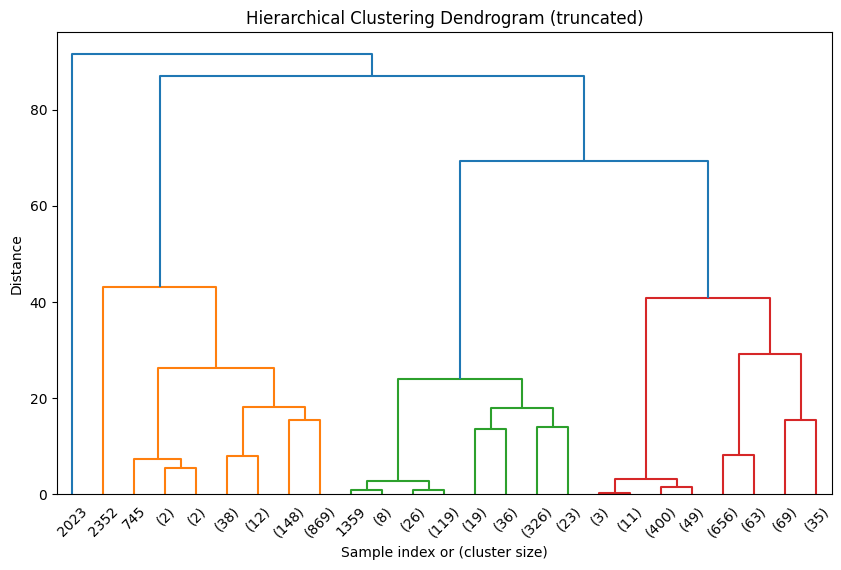

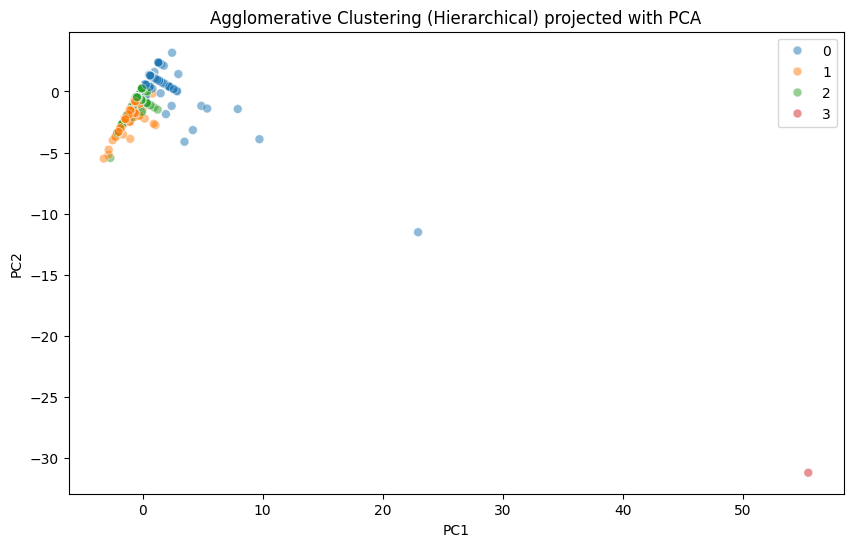

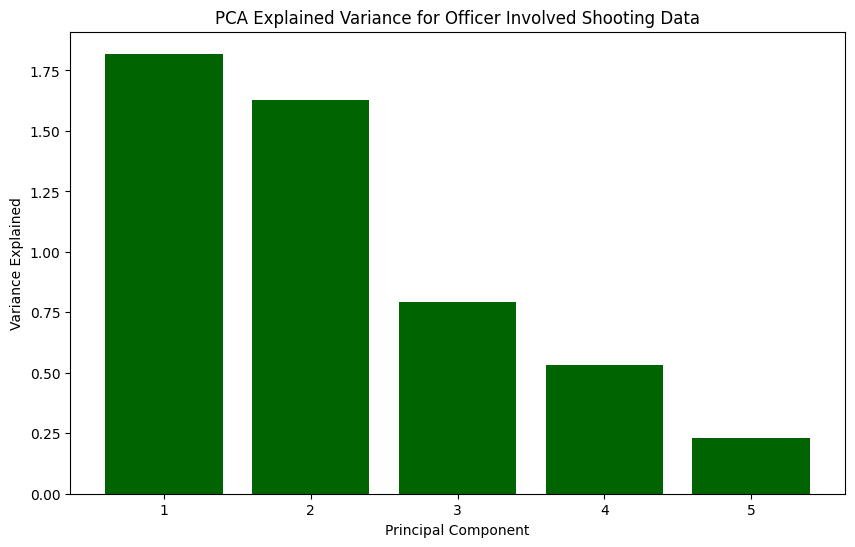

Cluster means (original scale):
   Victims Killed  Victims Injured  Suspects Killed  Suspects Injured  \
0        0.339236         1.522833         1.013048          0.000932   
1        0.129032         1.268817         0.046595          1.039427   
2        0.077760         1.200622         0.001555          0.000000   
3       60.000000       439.000000         1.000000          0.000000   

   Suspects Arrested  
0           0.067102  
1           0.818996  
2           0.764386  
3           0.000000  


In [88]:
# --- 1) Load your data (already cleaned in your workflow) ---
df = pd.read_csv("gunviolencearchive_officer_involved_shooting.csv")

num_cols = ["Victims Killed", "Victims Injured", "Suspects Killed", 
            "Suspects Injured", "Suspects Arrested"]

df_num = df[num_cols].apply(pd.to_numeric, errors="coerce").dropna(how="all").fillna(0)
X = df_num.values

# --- 2) Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3) Dendrogram (for visualizing hierarchical structure) ---
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')   # Ward minimizes variance
dendrogram(linked, truncate_mode="level", p=5)  # p=5 shows last 5 merges
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# --- 4) Agglomerative clustering with chosen number of clusters ---
hclust = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_h = hclust.fit_predict(X_scaled)

# --- 5) Project to 2D for visualization ---
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels_h, palette="tab10", s=40, alpha=0.5)
plt.title("Agglomerative Clustering (Hierarchical) projected with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1,6), pca.explained_variance_, color='darkgreen')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Explained Variance for Officer Involved Shooting Data')
plt.show()

# --- 6) Optional: summarize cluster means ---
cluster_summary = pd.DataFrame(X, columns=num_cols).groupby(labels_h).mean()
print("Cluster means (original scale):")
print(cluster_summary)
